In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from numpy import random
import scipy.constants as const
from tabulate import tabulate
import math
%matplotlib inline

# Estimating $\pi$

In [ ]:
def area(N):
    # 1. Generate N=1000 random points (x,y) within a square of size [0, 1].
    points = np.zeros((N, 2), dtype=object)
    for i in range(N):
        points[i, 0] = np.random.random([1])
        points[i, 1] = np.random.random([1])
    # 2. Visualize the result with red dots when data points are inside the unit circle (otherwise blue dots). 
    # If the points give a radius less than one, it is inside
    # In the figure, draw the unit circle so the boundary is obvious
    for j in range (N):
        if np.sqrt(points[j, 0] ** 2 + points[j, 1] **2 ) < 1:
            plt.scatter(points[j, 0], points[j, 1], s=None, c='r')
        else:
            plt.scatter(points[j, 0], points[j, 1], s=None, c='b')
    x = np.linspace(0, 1, N)
    plt.plot(x, np.sqrt(1 - x **2 ), '-k', lw=3, label='unit circle boundary')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Estimating pi with a random sample and unit circle')
    return plt.show()
    
A = area(1000)


In [142]:
# 3. Count number of points inside the unit circle, and estimate the value and uncertainty of π
def estimate_pi(N):
    points = np.zeros((N, 2), dtype=object)
    x = points[:, 0]
    y = points[:, 1]
    z = np.zeros(N)
    for i in range(N):
        points[i, 0] = np.random.random([1])
        points[i, 1] = np.random.random([1])
    def inside_circle(points):
        inside = []
        for i in range(N):
            if np.sqrt(points[i, 0] ** 2 + points[i, 1] ** 2) < 1:
                inside.append(1)
            else:
                inside.append(0)
        return inside
    inside = inside_circle(points)
    density = 4. * np.count_nonzero(inside) / N # The area is 4*total number of points in/all points. Since r=1, it is also pi
    return density

error_1000 = np.abs(estimate_pi(1000) - np.pi)
print('For N = 1000, the estimate of pi is', estimate_pi(1000))
print('For N = 1000, the error in the estimate of pi is', error_1000)


For N = 1000, the estimate of pi is 3.164
For N = 1000, the error in the estimate of pi is 0.029592653589793017


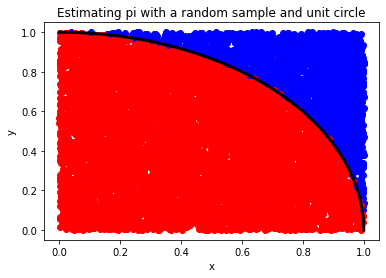

For N = 10000, the estimate of pi is 3.1284
For N = 10000, the error in the estimate of pi is 0.009592653589792999


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9ee8f2e5e0> (for post_execute):


KeyboardInterrupt: 

In [143]:
# 4. Repeat steps above with N=10K and 100K. Discuss results
# N=10k
area(10000)
error_10000 = np.abs(estimate_pi(10000) - np.pi)
print('For N = 10000, the estimate of pi is ' + str(estimate_pi(10000)))
print('For N = 10000, the error in the estimate of pi is', error_10000)

# N=100k
area(100000)
error_100000 = np.abs(estimate_pi(100000) - np.pi)
print('For N = 100000, the estimate of pi is ' + str(estimate_pi(100000)))
print('For N = 100000, the error in the estimate of pi is', error_100000)


For larger N, the estimate of pi is closer to the value of pi, with error decreasing. 

# Parabola Distribution

## Rejection Method

In [ ]:
def keep(N):   
    i = 0
    accept = np.zeros(N)
    count = 0
    def f(x):
        return x ** 2
    f_max = f(1)
    # Generate a random variable uniformly distributed between -1
    # and +1, and a second random ravariable unformly distributed between 0 and $f(1)$.
    # Keep $x_i$ if $y_i < f(x_i)$. Generate a sample with N=10K data points
    while i < N:
        x = random.uniform(low=-1., high=1.0, size=1)
        y = random.uniform(low=0., high=f_max, size=1)
        w = f(x)
        count += 1
        if w >= y:            
            accept[i] = x
            i = i + 1
    return accept, count

#Generate this sample until accepted events N=10000 events for target dist. of x_i
rejection_sample, count = keep(10000)

print(count)

## Inverse Transform Method

Calculate the cumulative function
\begin{equation}
y = F(x) \\
y = \frac{x^3}{3}
\end{equation}
Derive the inverse transformation function
\begin{equation}
x = F^{-1}(y) \\
x = 3^{1/3}y^{1/3}
\end{equation}




\begin{equation}
\end{equation}
\begin{equation}
\end{equation}

In [ ]:
yi = random.uniform(low=-1, high=1, size=1)
xi = np.power(yi,1/3)

In [ ]:
N = 10000
# Define empty vectors to store coordinates
x_vector = np.zeros(N)
y_vector = np.zeros(N)

# Generate a random uniform distribution y_i from [-1,1]
for i in range(N):
    yi = random.uniform(low=-1, high=1, size=1)
    yi2 = 3 * yi
    xi = yi2**(1/3) 
    x_vector[i] = xi
    y_vector[i] = yi

x = x_vector
y = y_vector

Compare the the consistency by drawing two simulated distributions and the target
distribution function $f(x)$ in the same plot. Comment on which method is more
effective in terms of total number of random numbers required for MC simulations.


In [ ]:
# Plot with estimations
fig, ax = plt.subplots(figsize=(10, 10))

x = np.linspace(-1, 1, 10000)
def parabola(f):
    p = f ** 2
    return p

ax.plot(x, parabola(x), label='target')

ax.scatter(rejection_sample, parabola(rejection_sample), c='g', alpha=0.1, label='rejection')

ax.scatter(x_vector, y_vector, c='r')
ax.scatter(-x_vector, y_vector, c='r')
plt.title("Parabola")
ax.legend()

Because the inverse cdf of the parabolic pdf involves a cubed root of a negative number, which ** and np.power do not allow, samples were taken on the interval y_i=[0,1] then mirrored over the x=0 axis. For N=10000 accepted events, the total iterations of the rejection sampling was more than twice N, at 29987. 